In [9]:
import pandas as pd  
from collections import Counter
cancer = pd.read_csv("MRI_Sree.csv")
cancer['Label'] = cancer['Label'].map({'GBM': 0, 'Recurrent GBM': 1})
X, y = cancer.drop(['Patient_ID_x','file'], axis=1), cancer['Label']
print(sorted(Counter(y).items()))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20,stratify = y)
X_test = X_test.drop(['Label'],axis=1)
X_train = X_train.drop(['Label'],axis=1)
print(len(X_train), len(X_test))
print(y_train.value_counts(), y_test.value_counts())

[(0, 235), (1, 50)]
199 86
0    164
1     35
Name: Label, dtype: int64 0    71
1    15
Name: Label, dtype: int64


In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
# clf = LinearSVC()
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
clf_smote = LinearSVC().fit(X_resampled, y_resampled)

[(0, 164), (1, 164)]


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The size of our training "X" (input features) is (328, 1199)


The size of our testing "X" (input features) is (86, 1199)


The size of our training "y" (output feature) is (328,)


The size of our testing "y" (output features) is (86,)
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        71
           1       0.62      0.67      0.65        15

    accuracy                           0.87        86
   macro avg       0.78      0.79      0.78        86
weighted avg       0.88      0.87      0.87        86



0.872093023255814

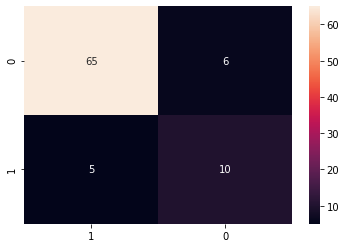

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_resampled)
X_test = sc.transform(X_test)

print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_resampled.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

from sklearn.svm import SVC

svc_model = SVC(kernel = 'rbf', random_state = 20)

svc_model.fit(X_train, y_resampled)

y_predict = svc_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['0', '1'],
                         columns=['1','0'])

sns.heatmap(confusion, annot=True)

print(classification_report(y_test, y_predict))


from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

%matplotlib inline


print("Random Forest")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("\n")
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# svc_model = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 20)
svc_model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
svc_model.fit(X_train, y_train)

y_predict = svc_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['0', '1'],
                         columns=['1','0'])

sns.heatmap(confusion, annot=True)

print(classification_report(y_test, y_predict))


from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predict))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predict))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn import metrics

%matplotlib inline
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("Gradient Boosting")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("\n")
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

from sklearn.ensemble import GradientBoostingClassifier

# svc_model = GradientBoostingClassifier()
params = {'n_estimators': 1500, 'max_depth': 3, 'subsample': 0.2,
          'learning_rate': 0.01, 'min_samples_leaf': 2, 'random_state': 0}
svc_model = ensemble.GradientBoostingClassifier(**params)

svc_model.fit(X_train, y_train)

y_predict = svc_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['0', '1'],
                         columns=['1','0'])

sns.heatmap(confusion, annot=True)

print(classification_report(y_test, y_predict))


from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predict))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predict))